# Problem 1 Sharing and executing the official tutorial model

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
# dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# model architecture
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(10)])

In [5]:
# not trained model 
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.01732822,  0.09751379,  0.43244794, -0.49461657, -0.06304891,
         0.5951032 , -1.0284455 , -0.49546194, -0.8981193 ,  0.2024337 ]],
      dtype=float32)

In [6]:
# softmax
tf.nn.softmax(predictions).numpy()

array([[0.10575148, 0.11458048, 0.16016613, 0.06337993, 0.09758412,
        0.18845645, 0.03716317, 0.06332637, 0.04233628, 0.12725559]],
      dtype=float32)

In [7]:
# loss function 
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [8]:
# loss debug
loss_fn(y_train[:1], predictions).numpy()

1.6688883

In [13]:
model.compile(loss=loss_fn,
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2993 - accuracy: 0.9131
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1454 - accuracy: 0.9575
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1059 - accuracy: 0.9675
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0879 - accuracy: 0.9730
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0762 - accuracy: 0.9761
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0652 - accuracy: 0.9800
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0590 - accuracy: 0.9814
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0526 - accuracy: 0.9835
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0494 - accuracy: 0.9838
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.04

In [15]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0725 - accuracy: 0.9814 - 949ms/epoch - 3ms/step


[0.07250611484050751, 0.9814000129699707]

In [23]:
predictions = model(x_test[4:5]).numpy()
np.round(tf.nn.softmax(predictions).numpy().astype("float32"), 3)

array([[0.   , 0.   , 0.   , 0.   , 0.998, 0.   , 0.   , 0.   , 0.   ,
        0.002]], dtype=float32)

In [24]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [26]:
np.round(probability_model(x_test[:5]).numpy(), 3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.998, 0.   , 0.   , 0.   , 0.   ,
        0.002]], dtype=float32)

# [Problem 2] (Advance assignment) Execute various methods

# [Problem 3] Learning Iris (binary classification) with Keras

In [29]:
df = pd.read_csv("../data/Iris.csv")

#Condition extraction from data frame
df = df[(df["Species"] == "Iris-versicolor") | (df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
# NumPy
X = np.array(X)
y = np.array(y)
# Convert label to number
y[y == "Iris-versicolor"] = 0
y[y == "Iris-virginica"] = 1
y = y.astype(np.int64)[:, np.newaxis]
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [30]:
# data scaling 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [31]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

In [32]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu', input_shape=(4,)))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                250       
                                                                 
 dense_3 (Dense)             (None, 100)               5100      
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5451 (21.29 KB)
Trainable params: 5451 (21.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/20
4/4 - 2s - loss: 0.5690 - accuracy: 0.7188 - val_loss: 0.2374 - val_accuracy: 1.0000 - 2s/epoch - 453ms/step
Epoch 2/20
4/4 - 0s - loss: 0.2600 - accuracy: 0.9219 - val_loss: 0.0751 - val_accuracy: 1.0000 - 101ms/epoch - 25ms/step
Epoch 3/20
4/4 - 0s - loss: 0.1216 - accuracy: 0.9688 - val_loss: 0.0312 - val_accuracy: 1.0000 - 78ms/epoch - 19ms/step
Epoch 4/20
4/4 - 0s - loss: 0.0837 - accuracy: 0.9531 - val_loss: 0.0208 - val_accuracy: 1.0000 - 122ms/epoch - 30ms/step
Epoch 5/20
4/4 - 0s - loss: 0.0560 - accuracy: 0.9688 - val_loss: 0.0233 - val_accuracy: 1.0000 - 91ms/epoch - 23ms/step
Epoch 6/20
4/4 - 0s - loss: 0.0211 - accuracy: 1.0000 - val_loss: 0.0307 - val_accuracy: 1.0000 - 90ms/epoch - 22ms/step
Epoch 7/20
4/4 - 0s - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.0297 - val_accuracy: 1.0000 - 87ms/epoch - 22ms/step
Epoch 8/20
4/4 - 0s - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0208 - val_accuracy: 1.0000 - 81ms/epoch - 20ms/step
Epoch 9/20
4/4 - 0s - loss: 0.0

In [36]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.0006272855098359287
Train accuracy: 1.0


# [Problem 4] Learn Iris (multi-level classification) with Keras

In [39]:
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv("../data/Iris.csv")

#Condition extraction from data frame
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X).astype(np.float32)

# Convert label to number
y[y == "Iris-setosa"] = 0
y[y == "Iris-versicolor"] = 1
y[y == "Iris-virginica"] = 2

# One Hot encoder
enc = OneHotEncoder(handle_unknown='ignore')
y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [40]:
# Standardizing
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [41]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 3

In [42]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(n_input))
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu'))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='sigmoid'))

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                250       
                                                                 
 dense_6 (Dense)             (None, 100)               5100      
                                                                 
 dense_7 (Dense)             (None, 3)                 303       
                                                                 
Total params: 5653 (22.08 KB)
Trainable params: 5653 (22.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [45]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/20
5/5 - 2s - loss: 0.8325 - accuracy: 0.6771 - val_loss: 0.4885 - val_accuracy: 0.7917 - 2s/epoch - 391ms/step
Epoch 2/20
5/5 - 0s - loss: 0.3588 - accuracy: 0.8958 - val_loss: 0.3484 - val_accuracy: 0.7917 - 161ms/epoch - 32ms/step
Epoch 3/20
5/5 - 0s - loss: 0.2384 - accuracy: 0.9167 - val_loss: 0.3750 - val_accuracy: 0.7917 - 122ms/epoch - 24ms/step
Epoch 4/20
5/5 - 0s - loss: 0.1607 - accuracy: 0.9375 - val_loss: 0.3564 - val_accuracy: 0.7917 - 147ms/epoch - 29ms/step
Epoch 5/20
5/5 - 0s - loss: 0.1135 - accuracy: 0.9688 - val_loss: 0.3507 - val_accuracy: 0.7917 - 120ms/epoch - 24ms/step
Epoch 6/20
5/5 - 0s - loss: 0.0938 - accuracy: 0.9583 - val_loss: 0.3490 - val_accuracy: 0.8333 - 153ms/epoch - 31ms/step
Epoch 7/20
5/5 - 0s - loss: 0.0712 - accuracy: 0.9792 - val_loss: 0.3664 - val_accuracy: 0.8750 - 116ms/epoch - 23ms/step
Epoch 8/20
5/5 - 0s - loss: 0.0618 - accuracy: 0.9896 - val_loss: 0.2500 - val_accuracy: 0.9167 - 166ms/epoch - 33ms/step
Epoch 9/20
5/5 - 0s - loss

In [46]:
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose = 0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Train loss: 0.04934503510594368
Train accuracy: 0.9791666865348816
Test loss: 0.020072953775525093
Test accuracy: 1.0


# [Problem 5] Learning House Prices with Keras

In [47]:
df = pd.read_csv("../data/house_price/train.csv")
#Condition extraction from data frame
y = df["SalePrice"]
X = df.loc[:, ["GrLivArea", "YearBuilt"]]
y = np.log(np.array(y).reshape(-1, 1))
X = np.array(X).astype(np.float32)
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split into train and test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [48]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_class = 1

In [49]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(n_input))
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu'))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='linear'))

In [50]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                150       
                                                                 
 dense_9 (Dense)             (None, 100)               5100      
                                                                 
 dense_10 (Dense)            (None, 3)                 303       
                                                                 
Total params: 5553 (21.69 KB)
Trainable params: 5553 (21.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
model.compile(loss='mean_squared_error',
              optimizer=tf.optimizers.Adagrad(learning_rate=0.005),
              metrics=['mse'])

In [52]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/20
47/47 - 1s - loss: 2491.1143 - mse: 2491.1143 - val_loss: 20.2119 - val_mse: 20.2119 - 889ms/epoch - 19ms/step
Epoch 2/20
47/47 - 0s - loss: 15.2790 - mse: 15.2790 - val_loss: 9.7095 - val_mse: 9.7095 - 181ms/epoch - 4ms/step
Epoch 3/20
47/47 - 0s - loss: 6.0870 - mse: 6.0870 - val_loss: 6.7372 - val_mse: 6.7372 - 216ms/epoch - 5ms/step
Epoch 4/20
47/47 - 0s - loss: 3.8510 - mse: 3.8510 - val_loss: 3.0592 - val_mse: 3.0592 - 179ms/epoch - 4ms/step
Epoch 5/20
47/47 - 0s - loss: 2.8142 - mse: 2.8142 - val_loss: 2.1521 - val_mse: 2.1521 - 202ms/epoch - 4ms/step
Epoch 6/20
47/47 - 1s - loss: 1.9753 - mse: 1.9753 - val_loss: 2.3786 - val_mse: 2.3786 - 631ms/epoch - 13ms/step
Epoch 7/20
47/47 - 0s - loss: 1.4771 - mse: 1.4771 - val_loss: 1.2814 - val_mse: 1.2814 - 250ms/epoch - 5ms/step
Epoch 8/20
47/47 - 0s - loss: 1.2470 - mse: 1.2470 - val_loss: 1.3441 - val_mse: 1.3441 - 209ms/epoch - 4ms/step
Epoch 9/20
47/47 - 0s - loss: 0.9712 - mse: 0.9712 - val_loss: 1.1021 - val_mse: 1.1

In [53]:
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose = 0)
print('Train loss:', train_score[0])
print('Train mse:', train_score[1])
print('Test loss:', test_score[0])
print('Test mse:', test_score[1])

Train loss: 0.40809664130210876
Train mse: 0.40809664130210876
Test loss: 0.8928992748260498
Test mse: 0.8928992748260498


# [Problem 6] Learning MNIST with Keras

In [54]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [55]:
print(X_train.shape) # (60000, 28, 28)
print(y_train.shape) # (10000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(y_test.shape)
print(X_train[0].dtype) # uint8

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
uint8


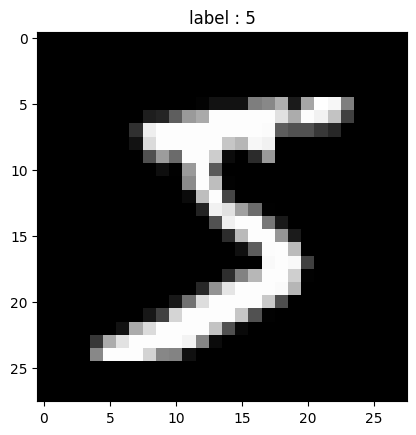

In [56]:
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

In [57]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import mnist
from sklearn.metrics import accuracy_score

In [59]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
X_train = X_train / 255.0
X_test = X_test / 255.0

enc = OneHotEncoder(handle_unknown='ignore')
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis]).toarray()
y_test_one_hot = enc.transform(y_test[:, np.newaxis]).toarray()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(48000, 784)
(10000, 784)


In [60]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 10

**Model architecture**

In [61]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(n_input))
model.add(tf.keras.layers.Dense(n_hidden1, activation='relu'))
model.add(tf.keras.layers.Dense(n_hidden2, activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))

In [62]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 50)                39250     
                                                                 
 dense_12 (Dense)            (None, 100)               5100      
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 45360 (177.19 KB)
Trainable params: 45360 (177.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [64]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
2400/2400 [==============================] - 12s 5ms/step - loss: 0.2848 - accuracy: 0.9164 - val_loss: 0.1625 - val_accuracy: 0.9524
Epoch 2/10
2400/2400 [==============================] - 14s 6ms/step - loss: 0.1356 - accuracy: 0.9585 - val_loss: 0.1395 - val_accuracy: 0.9561
Epoch 3/10
2400/2400 [==============================] - 17s 7ms/step - loss: 0.0995 - accuracy: 0.9691 - val_loss: 0.1174 - val_accuracy: 0.9636
Epoch 4/10
2400/2400 [==============================] - 18s 8ms/step - loss: 0.0814 - accuracy: 0.9740 - val_loss: 0.1115 - val_accuracy: 0.9666
Epoch 5/10
2400/2400 [==============================] - 11s 4ms/step - loss: 0.0668 - accuracy: 0.9779 - val_loss: 0.1069 - val_accuracy: 0.9690
Epoch 6/10
2400/2400 [==============================] - 11s 5ms/step - loss: 0.0547 - accuracy: 0.9824 - val_loss: 0.1107 - val_accuracy: 0.9697
Epoch 7/10
2400/2400 [==============================] - 12s 5ms/step - loss: 0.0470 - accuracy: 0.9845 - val_loss: 0.1108 - val_ac

In [65]:
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test_one_hot, verbose = 0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Train loss: 0.02445949986577034
Train accuracy: 0.991812527179718
Test loss: 0.10069000720977783
Test accuracy: 0.9731000065803528


# [Problem 7] (Advance assignment) Rewriting to PyTorch

## Binary classification: Iris Dataset on Pytorch

In [67]:
!pip install torch


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
df = pd.read_csv("../data/Iris.csv")

#Condition extraction from data frame
df = df[(df["Species"] == "Iris-versicolor") | (df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
# NumPy
X = np.array(X)
y = np.array(y)
# Convert label to number
y[y == "Iris-versicolor"] = 0
y[y == "Iris-virginica"] = 1
y = y.astype(np.int64)[:, np.newaxis]
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [69]:
# data scaling 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [70]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

In [71]:
import torch
import torch.nn as nn

In [72]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [118]:
class Loader:

    def __init__(self, x, y, shuffle=True, batch_size=16):
        
        self.X = x
        self.y = y.astype("float32")

        self.shuffle = shuffle
        self.batch_size = batch_size
        self.n_conts = self.X.shape[1]
        self.len = self.X.shape[0]
        n_batches, remainder = divmod(self.len, self.batch_size)

        if remainder > 0:
            n_batches += 1
        self.n_batches = n_batches
        self.remainder = remainder  # for debugging

        self.idxes = np.array([i for i in range(self.len)])

    def __iter__(self):
        self.i = 0
        if self.shuffle:
            ridxes = self.idxes
            np.random.shuffle(ridxes)
            self.X = self.X[ridxes]
            if self.y is not None:
                self.y = self.y[ridxes]

        return self

    def __next__(self):
        if self.i >= self.len:
            raise StopIteration

        X = torch.FloatTensor(self.X[self.i:self.i + self.batch_size, :])
    
        if self.y is not None:
       
            y = torch.FloatTensor(self.y[self.i:self.i + self.batch_size])
     
        else:
            y = None


        batch = (X, y) 
        self.i += self.batch_size
        return batch

    def __len__(self):
        return self.n_batches

In [84]:
# pytorch dataloader 
train_loader = Loader(X_train, y_train)
val_loader = Loader(X_val, y_val)
test_loader = Loader(X_test, y_test)

In [85]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)  
        self.relu2 = nn.ReLU()
        self.out = nn.Linear(hidden_size2, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.out(out)
        return out

In [86]:
model = NeuralNet(input_size=n_input,
                  hidden_size1=n_hidden1,
                  hidden_size2=n_hidden2,
                  num_classes=n_classes).to(device)

In [88]:
# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):  
        # Move tensors to the configured device
        x = x.to(device)
        y = y.to(device)
        
        # Forward pass
        logit = model(x)
        loss = criterion(logit, y)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/20], Step [2/4], Loss: 0.0015
Epoch [1/20], Step [4/4], Loss: 0.0000
Epoch [2/20], Step [2/4], Loss: 0.0073
Epoch [2/20], Step [4/4], Loss: 0.0001
Epoch [3/20], Step [2/4], Loss: 0.0281
Epoch [3/20], Step [4/4], Loss: 0.0000
Epoch [4/20], Step [2/4], Loss: 0.0000
Epoch [4/20], Step [4/4], Loss: 0.0006
Epoch [5/20], Step [2/4], Loss: 0.0004
Epoch [5/20], Step [4/4], Loss: 0.0002
Epoch [6/20], Step [2/4], Loss: 0.0001
Epoch [6/20], Step [4/4], Loss: 0.0001
Epoch [7/20], Step [2/4], Loss: 0.0000
Epoch [7/20], Step [4/4], Loss: 0.0021
Epoch [8/20], Step [2/4], Loss: 0.0002
Epoch [8/20], Step [4/4], Loss: 0.0000
Epoch [9/20], Step [2/4], Loss: 0.0004
Epoch [9/20], Step [4/4], Loss: 0.0001
Epoch [10/20], Step [2/4], Loss: 0.0002
Epoch [10/20], Step [4/4], Loss: 0.0001
Epoch [11/20], Step [2/4], Loss: 0.0000
Epoch [11/20], Step [4/4], Loss: 0.0003
Epoch [12/20], Step [2/4], Loss: 0.0001
Epoch [12/20], Step [4/4], Loss: 0.0003
Epoch [13/20], Step [2/4], Loss: 0.0001
Epoch [13/20], Ste

In [94]:
y_true = []
preds = []
for i, (x, y) in enumerate(val_loader):  
    x = x.to(device)
    y = y.to(device)

    logit = model(x)
    y_true.append(y)
    preds.append(logit.sigmoid())
    

In [95]:
preds = torch.cat(preds, axis=0).detach().cpu().numpy()
y_true = torch.cat(y_true, axis=0).detach().cpu().numpy()

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, np.where(preds>=0.5, 1, 0))

1.0

In [99]:
y_true = []
preds = []
for i, (x, y) in enumerate(test_loader):  
    x = x.to(device)
    y = y.to(device)

    logit = model(x)
    y_true.append(y)
    preds.append(logit.sigmoid())

preds = torch.cat(preds, axis=0).detach().cpu().numpy()
y_true = torch.cat(y_true, axis=0).detach().cpu().numpy()
accuracy_score(y_true, np.where(preds>=0.5, 1, 0))

0.9

## Multi classification: Iris Dataset on Pytorch

In [102]:
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv("../data/Iris.csv")

#Condition extraction from data frame
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X).astype(np.float32)

# Convert label to number
y[y == "Iris-setosa"] = 0
y[y == "Iris-versicolor"] = 1
y[y == "Iris-virginica"] = 2

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [103]:
# data scaling 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [104]:
# Hyperparameters
learning_rate = 0.01
batch_size = 20
num_epochs = 20
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 3

In [107]:
model = NeuralNet(input_size=n_input,
                  hidden_size1=n_hidden1,
                  hidden_size2=n_hidden2,
                  num_classes=n_classes).to(device)
model

NeuralNet(
  (fc1): Linear(in_features=4, out_features=50, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=50, out_features=100, bias=True)
  (relu2): ReLU()
  (out): Linear(in_features=100, out_features=3, bias=True)
)

In [119]:
# pytorch dataloader 
train_loader = Loader(X_train, y_train)
val_loader = Loader(X_val, y_val)
test_loader = Loader(X_test, y_test)

In [121]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):  
        # Move tensors to the configured device
        x = x.to(device)
        y = y.to(device)
        
        # Forward pass
        logit = model(x)
        loss = criterion(logit, y.long())
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/20], Step [2/6], Loss: 0.0161
Epoch [1/20], Step [4/6], Loss: 0.0704
Epoch [1/20], Step [6/6], Loss: 0.1022
Epoch [2/20], Step [2/6], Loss: 0.0002
Epoch [2/20], Step [4/6], Loss: 0.0002
Epoch [2/20], Step [6/6], Loss: 0.0007
Epoch [3/20], Step [2/6], Loss: 0.0624
Epoch [3/20], Step [4/6], Loss: 0.0010
Epoch [3/20], Step [6/6], Loss: 0.1367
Epoch [4/20], Step [2/6], Loss: 0.0112
Epoch [4/20], Step [4/6], Loss: 0.0192
Epoch [4/20], Step [6/6], Loss: 0.0263
Epoch [5/20], Step [2/6], Loss: 0.0002
Epoch [5/20], Step [4/6], Loss: 0.0009
Epoch [5/20], Step [6/6], Loss: 0.0551
Epoch [6/20], Step [2/6], Loss: 0.0258
Epoch [6/20], Step [4/6], Loss: 0.0023
Epoch [6/20], Step [6/6], Loss: 0.0222
Epoch [7/20], Step [2/6], Loss: 0.0286
Epoch [7/20], Step [4/6], Loss: 0.0002
Epoch [7/20], Step [6/6], Loss: 0.0492
Epoch [8/20], Step [2/6], Loss: 0.0060
Epoch [8/20], Step [4/6], Loss: 0.0001
Epoch [8/20], Step [6/6], Loss: 0.0089
Epoch [9/20], Step [2/6], Loss: 0.0016
Epoch [9/20], Step [4/6],

In [123]:
y_true = []
preds = []
for i, (x, y) in enumerate(test_loader):  
    x = x.to(device)
    y = y.to(device)

    logit = model(x)
    y_true.append(y)
    _, predicted = torch.max(logit.data, 1)
    preds.append(predicted)

preds = torch.cat(preds, axis=0).detach().cpu().numpy()
y_true = torch.cat(y_true, axis=0).detach().cpu().numpy()
accuracy_score(y_true, np.where(preds>=0.5, 1, 0))

0.8

## MNIST TASK

SOURCE: https://github.com/lhagiimn/pytorch-tutorial/blob/master/tutorials/01-basics/feedforward_neural_network/main.py 